## Table of Contents

1. [Introduction](#Introduction)
2. [Data Loading](#Data-Loading)
3. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Predictive Modeling](#Predictive-Modeling)
6. [Conclusion](#Conclusion)

# Introduction

Netflix content can be as eclectic as it is entertaining. In this notebook, we explore the data on Netflix shows and movies, specifically looking at features such as release year, runtime, and the ever-important IMDB ratings. Our goal is to uncover insights and even create a predictor for IMDB scores.

In [1]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Use Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Ensure correct backend if only plt is imported
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# For reproducibility
np.random.seed(42)

# Print a brief message to indicate that libraries have been imported
print('Libraries imported and backend configured')

Libraries imported and backend configured


# Data Loading

In this section, we load the Netflix TV Shows and Movies data from the CSV file. This dataset contains information such as title, type, description, release_year, runtime, and IMDB scores among others.

In [2]:
# Load the data from the CSV file
file_path = '/kaggle/input/netflix-movies-and-shows-imdb-scores/Netflix TV Shows and Movies.csv'
try:
    df = pd.read_csv(file_path, encoding='utf-8')
    print('Data loaded successfully, shape:', df.shape)
except Exception as e:
    print('Error loading data:', e)
    # This error handling is important as file path or encoding issues are common obstacles for many notebook creators.

Data loaded successfully, shape: (5283, 11)


# Data Cleaning and Preprocessing

We now examine the data for missing values and potential data quality issues. Note that while the dataset is relatively clean, conversion of columns (if required) is performed and unnecessary columns are dropped. Additionally, since no date column exists explicitly, no date conversion is needed in our case.

In [3]:
# Quick overview of the dataset
print('Data Head:')
print(df.head())

print('\nData Information:')
print(df.info())

# Check for missing values
print('\nMissing Values by Column:')
print(df.isnull().sum())

# Filling missing numeric values with median (if any) and categorical with mode
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
    else:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)

# Sometimes missing values or inconsistencies can be a headache. This approach of using median and mode values helps to keep things under control.

print('\nMissing Values after Imputation:')
print(df.isnull().sum())

# Remove duplicate rows if any
df.drop_duplicates(inplace=True)
print('\nData shape after removing duplicates:', df.shape)

Data Head:
   index        id                            title   type  \
0      0   tm84618                      Taxi Driver  MOVIE   
1      1  tm127384  Monty Python and the Holy Grail  MOVIE   
2      2   tm70993                    Life of Brian  MOVIE   
3      3  tm190788                     The Exorcist  MOVIE   
4      4   ts22164     Monty Python's Flying Circus   SHOW   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-year-old Regan MacNeil begins to adapt an e...          1973   
4  A British sketch comedy series with the shows ...          1969   

  age_certification  runtime    imdb_id  imdb_score  imdb_votes  
0                 R      113  tt0075314         8.3    795222.0  
1                PG       91  tt0071853         8.2    530877.0

# Exploratory Data Analysis

Here we explore the dataset through visualization methods in order to extract patterns and relationships. We make use of several plot types such as histograms, count plots, pair plots, and heatmaps.

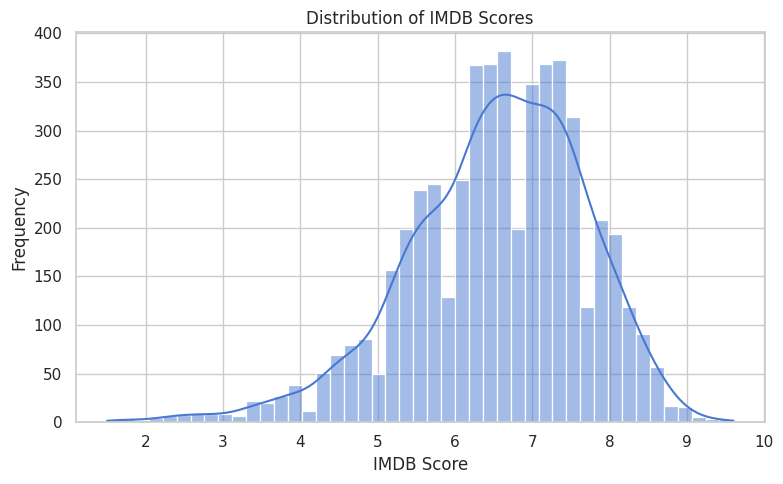

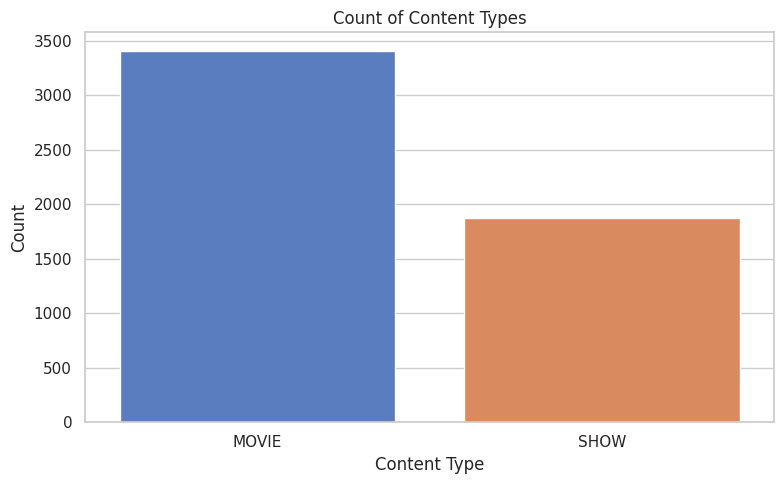

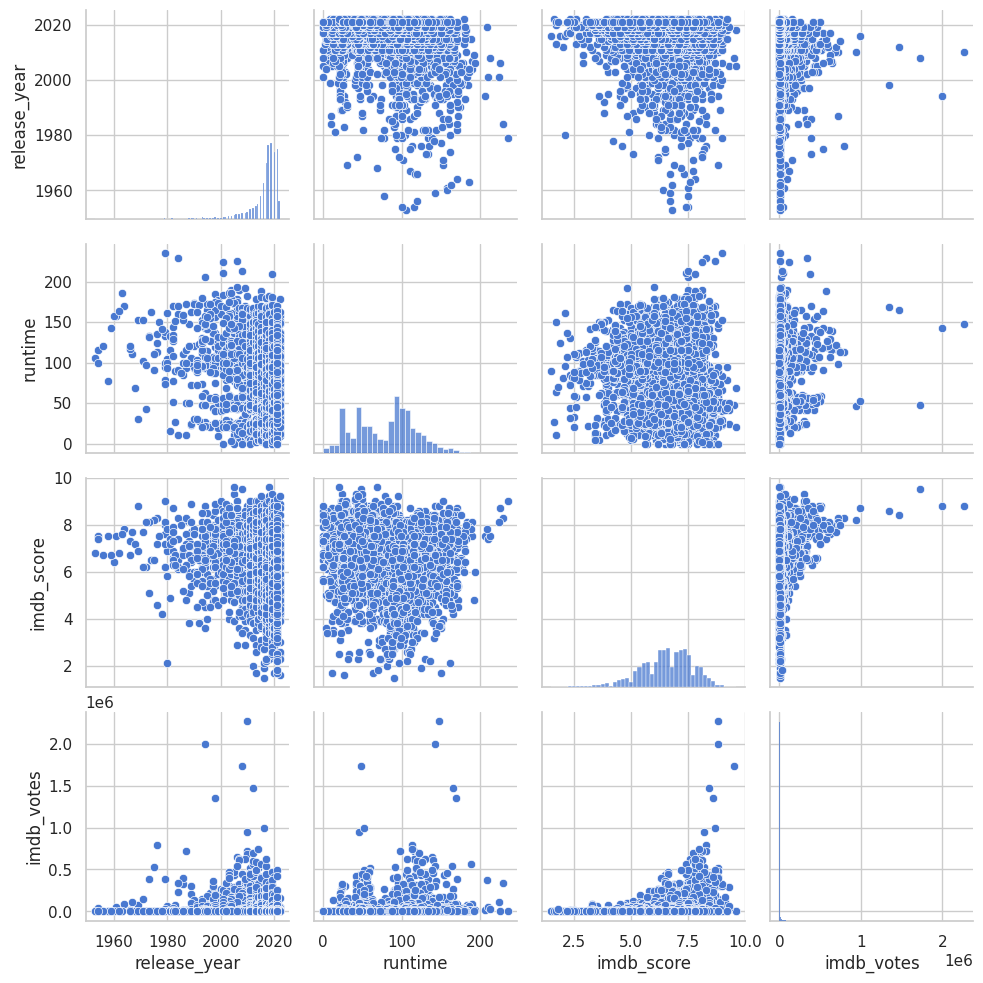

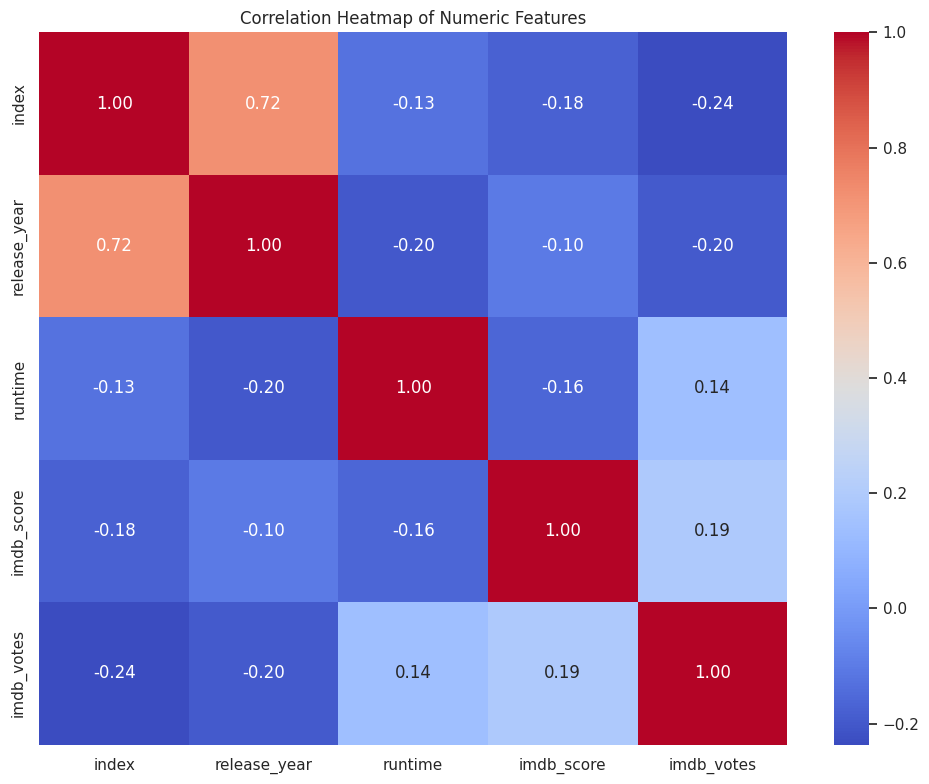

In [4]:
# Set the visual style
sns.set(style='whitegrid', palette='muted')

# Histogram for IMDB Score
plt.figure(figsize=(8, 5))
sns.histplot(df['imdb_score'], kde=True)
plt.title('Distribution of IMDB Scores')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Count plot for content type: Movie vs TV Show
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Count of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Pair plot for selected numeric features
numeric_features = ['release_year', 'runtime', 'imdb_score', 'imdb_votes']
sns.pairplot(df[numeric_features])
plt.show()

# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

# Predictive Modeling

We now attempt to predict the IMDB score of a show or movie using features such as release year, runtime, and the number of IMDB votes. While this regression model might not capture the full nuance of what makes a show or movie great, it is a good starting point. If you find that our predictor performs well, feel free to upvote to show some love.

R2 Score: 0.07770788048772848


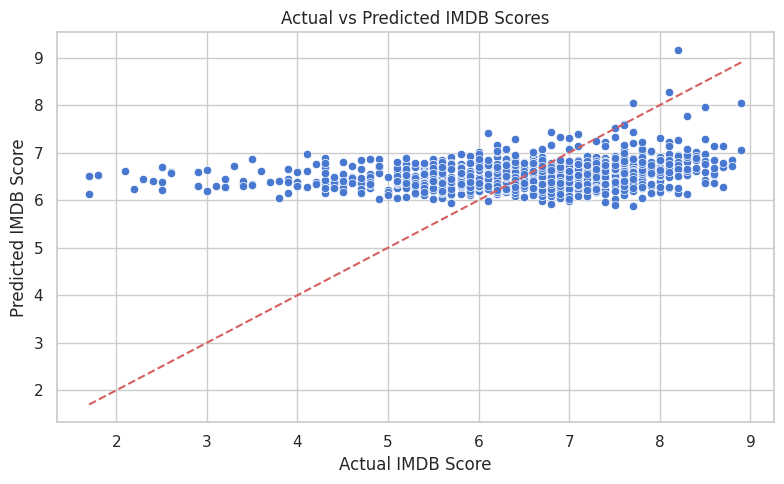

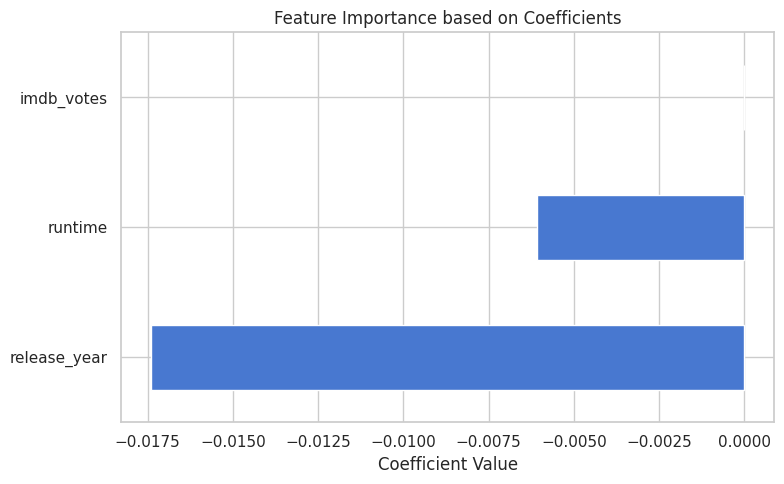

In [5]:
# Define the feature set and target variable
features = ['release_year', 'runtime', 'imdb_votes']
target = 'imdb_score'

# Prepare X and y
X = df[features]
y = df[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance using R2 score
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

# Scatter plot of Actual vs Predicted IMDB Scores
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual IMDB Score')
plt.ylabel('Predicted IMDB Score')
plt.title('Actual vs Predicted IMDB Scores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

# Permutation importance using the coefficients as a simple proxy (since we are using a linear model)
importance = pd.Series(model.coef_, index=features).sort_values()

plt.figure(figsize=(8, 5))
importance.plot(kind='barh')
plt.title('Feature Importance based on Coefficients')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

# Conclusion

This notebook provided an analysis of Netflix TV shows and movies with a focus on exploring and predicting IMDB scores. We began with data loading and cleaning, followed by an exploratory phase that leveraged multiple visualizations in order to better understand the data. Through a basic linear regression model, we attempted to quantify the relationship between release year, runtime, and IMDb votes on the IMDb score. 

A few merits of this approach include the comprehensive visualization suite that addresses both distributional shapes and relationships, as well as the quick sanity-check provided by the regression model. Future analysis could build upon these findings by incorporating more complex models (or additional features such as textual analysis of descriptions) to potentially improve prediction accuracy.

